In [1]:
from PIL import Image, ImageFilter
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read image
a = Image.open("image_test.png")

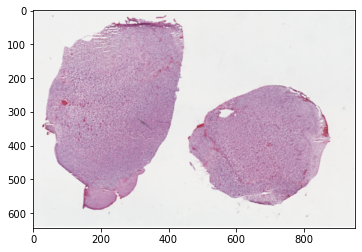

In [3]:
## Display
#a.show() ## This opens Photo Viewer
plt.imshow(a)

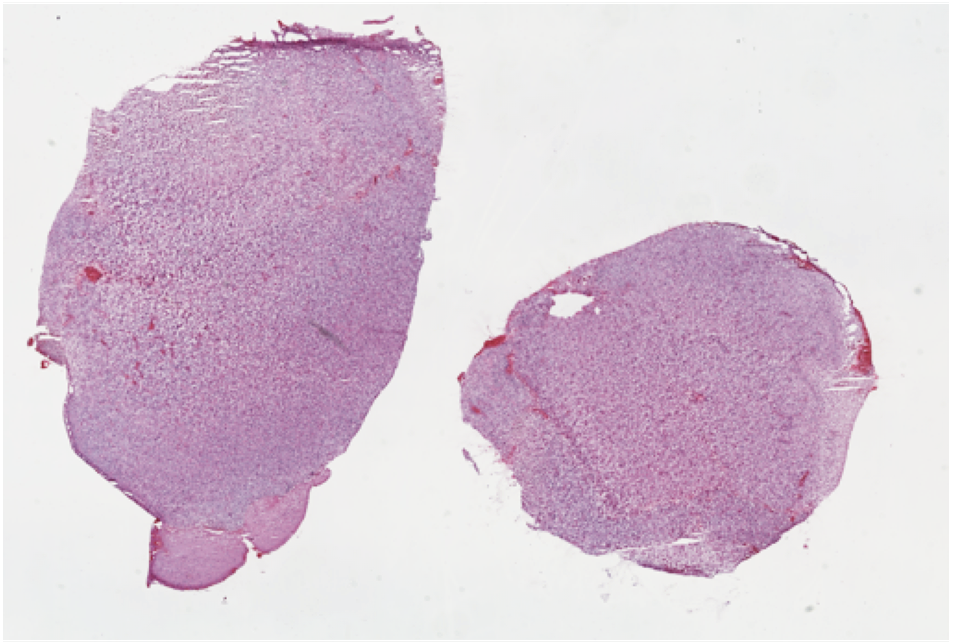

In [4]:
display(a)

In [5]:
## Explore the image properties
print(a.size)  ## width, height
print(a.format)
print(a.mode)

(954, 644)
PNG
RGBA


In [6]:
## Save
a.save("a.png")

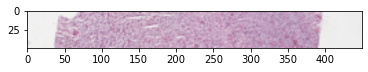

In [7]:
## Crop
left = 50; top = 100; right = 500; bottom = 150  ## pixel coords of area to crop out
pos = (left,top,right,bottom)  ## width = right-left, height = bottom - top
b = a.crop(pos)  ## select based on position of (left,top) and (right,bottom)
plt.imshow(b)

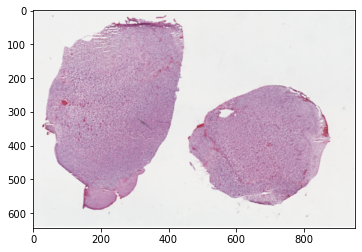

In [8]:
## copy
c = a.copy()
plt.imshow(c)

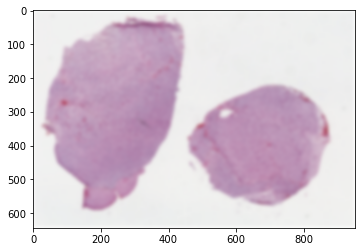

In [9]:
## blur
b = a.filter(ImageFilter.GaussianBlur(5))
plt.imshow(b)

Text(0.5, 1.0, 'TRANSPOSE')

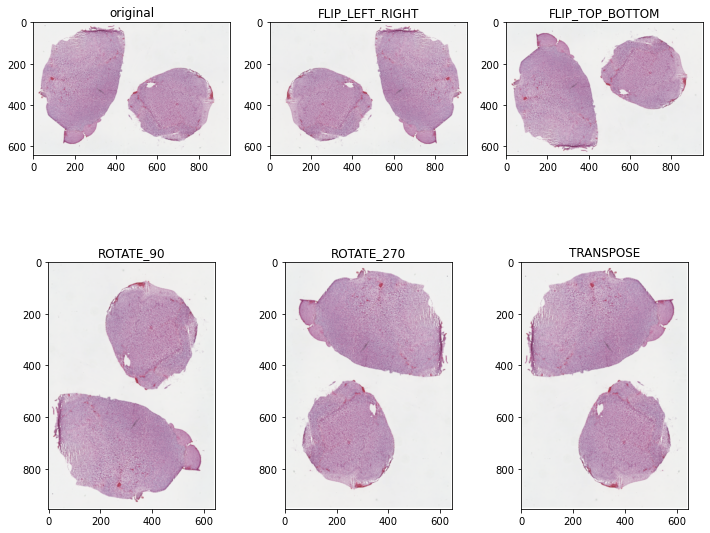

In [10]:
## transpose

## inverse the rows of image
b1 = a.transpose(Image.FLIP_LEFT_RIGHT)

## inverse the columns of image
b2 = a.transpose(Image.FLIP_TOP_BOTTOM)

## rotate the image by angle of 90
b3 = a.transpose(Image.ROTATE_90)

## rotate the image by angle of 270
b4 = a.transpose(Image.ROTATE_270)

## convert rows into columns
b5 = a.transpose(Image.TRANSPOSE)

plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
plt.imshow(a)
plt.title("original")

plt.subplot(2,3,2)
plt.imshow(b1)
plt.title("FLIP_LEFT_RIGHT")

plt.subplot(2,3,3)
plt.imshow(b2)
plt.title("FLIP_TOP_BOTTOM")

plt.subplot(2,3,4)
plt.imshow(b3)
plt.title("ROTATE_90")

plt.subplot(2,3,5)
plt.imshow(b4)
plt.title("ROTATE_270")

plt.subplot(2,3,6)
plt.imshow(b5)
plt.title("TRANSPOSE")

current size: (954, 644)
new_size: (400, 300)


Text(0.5, 1.0, 'LANCZOS')

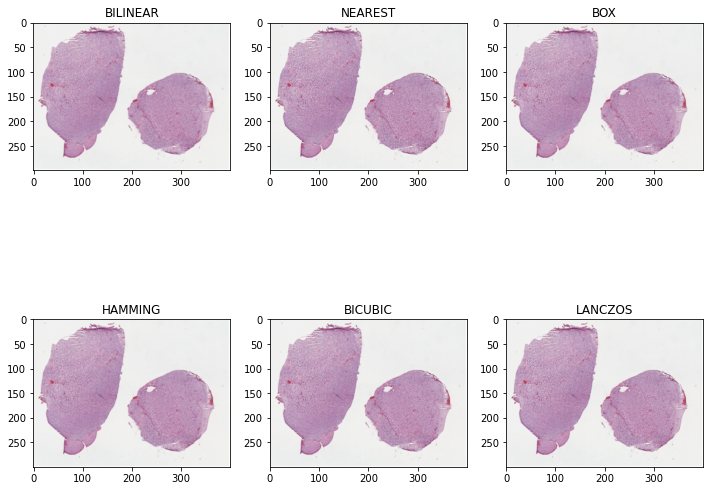

In [11]:
## resize: many available techniques
print("current size:", a.size)

new_size = (400,300)
print("new_size:", new_size)

b1 = a.resize(new_size,Image.BILINEAR)
b2 = a.resize(new_size,Image.NEAREST)
b3 = a.resize(new_size,Image.BOX)
b4 = a.resize(new_size,Image.HAMMING)
b5 = a.resize(new_size,Image.BICUBIC)
b6 = a.resize(new_size,Image.LANCZOS)

plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
plt.imshow(b1)
plt.title("BILINEAR")

plt.subplot(2,3,2)
plt.imshow(b2)
plt.title("NEAREST")

plt.subplot(2,3,3)
plt.imshow(b3)
plt.title("BOX")

plt.subplot(2,3,4)
plt.imshow(b4)
plt.title("HAMMING")

plt.subplot(2,3,5)
plt.imshow(b5)
plt.title("BICUBIC")

plt.subplot(2,3,6)
plt.imshow(b6)
plt.title("LANCZOS")

Text(0.5, 1.0, 'Rotate -10')

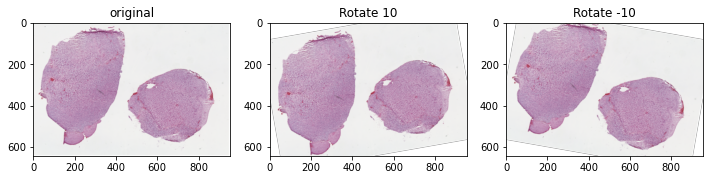

In [12]:
## Rotate
b1 = a.rotate(10)
b2 = a.rotate(-10)

plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
plt.imshow(a)
plt.title("original")

plt.subplot(1,3,2)
plt.imshow(b1)
plt.title("Rotate 10")

plt.subplot(1,3,3)
plt.imshow(b2)
plt.title("Rotate -10")

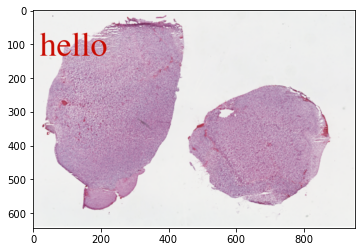

In [13]:
## add text into image
from PIL import ImageFont,ImageDraw

b = a.copy()

c = ImageDraw.Draw(b)

#font_type = ImageFont.load_default()
font_type = ImageFont.truetype("Times.ttc",100)

## (pos, text, fill_color, font_object)
c.text((20,60), "hello", (200,10,0),font=font_type)
plt.imshow(b)

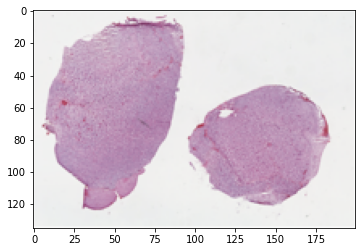

In [14]:
## add image into image
b = a.copy()
b.thumbnail((200,200)) ## (200,200) is the new size of b with the same ratio of `old` b
plt.imshow(b)

In [15]:
b.size

(200, 135)

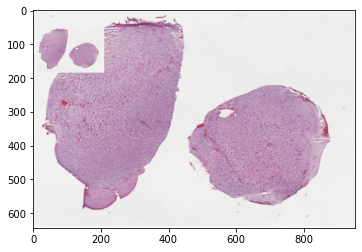

In [16]:
c = a.copy()
c.paste(b,(10,50)) ## position
plt.imshow(c)

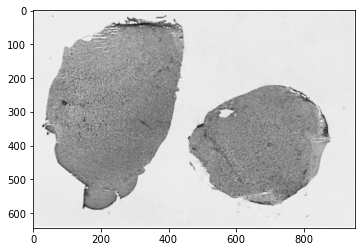

In [17]:
## convert to black and white
b = a.convert("L")
plt.imshow(b, cmap="gray")

In [18]:
## convert to different formats
b = a.convert("HSV")  ## HSV: Hue Staturated Value
print(b.mode)

HSV


In [19]:
## covert to numpy
b = np.array(a)
print(b.shape) ## note: Numpy shows as (height, width) while Image (width, height)

(644, 954, 4)


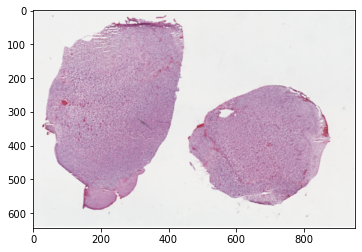

In [20]:
## convert the numpy back to image
c = Image.fromarray(b)
plt.imshow(c)

Text(0.5, 1.0, 'sharpness')

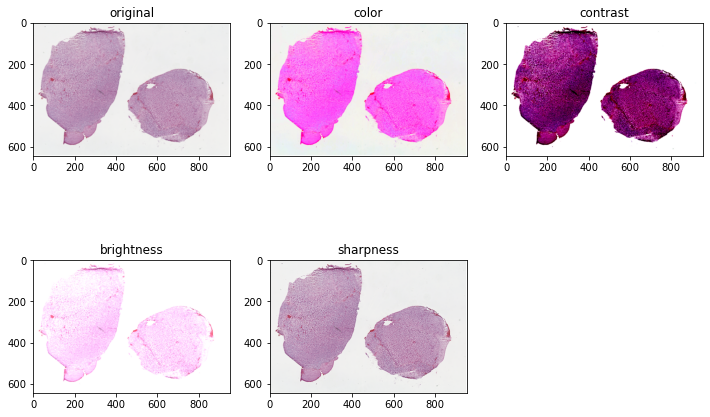

In [21]:
## Image enhancement: color, contrast, brightness, sharpness
## default = 1: image will be the same, > 1 enhance, < 1 diminish
from PIL import ImageEnhance

plt.figure(figsize=(12,8))
b = a.copy()
b1 = ImageEnhance.Color(b).enhance(4.2) 
b2 = ImageEnhance.Contrast(b).enhance(4.2)
b3 = ImageEnhance.Brightness(b).enhance(1.5)
b4 = ImageEnhance.Sharpness(b).enhance(6.0)

plt.subplot(2,3,1)
plt.imshow(b)
plt.title("original")

plt.subplot(2,3,2)
plt.imshow(b1)
plt.title("color")

plt.subplot(2,3,3)
plt.imshow(b2)
plt.title("contrast")

plt.subplot(2,3,4)
plt.imshow(b3)
plt.title("brightness")

plt.subplot(2,3,5)
plt.imshow(b4)
plt.title("sharpness")

Text(0.5, 1.0, 'alpha blend')

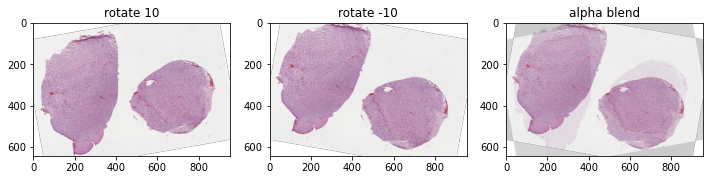

In [22]:
## Alpha blending: mixing of 2 images
## output = image1*(1-alpha) + image2*alpha

b1 = a.rotate(10)
b2 = a.rotate(-10)

## making image2 having the same size with image1
b2 = b2.resize(b1.size)

c = Image.blend(b1,b2,0.8)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(b1)
plt.title("rotate 10")

plt.subplot(1,3,2)
plt.imshow(b2)
plt.title("rotate -10")

plt.subplot(1,3,3)
plt.imshow(c)
plt.title("alpha blend")